Use this cell for all your imports

In [61]:
import numpy as np
import numpy.linalg as la
from scipy.sparse import coo_matrix
from sklearn.preprocessing import normalize

You will be working with the file data.txt. Use this cell to load its content into the appropriate data structure.

In [62]:
from google.colab import files
data = files.upload()

Saving data.txt to data (1).txt


In [95]:
# Load data from file
data = np.loadtxt("data.txt", comments="#", delimiter="\t", dtype=int, unpack=False, skiprows=2)

In [96]:
# Create the adjacency matrix
adjcency_matrix = coo_matrix((np.ones(data.shape[0]), (data[:, 0], data[:, 1])))

Use this cell to normalize the matrix as you see fit.

In [110]:
# Normalize adjacency matrix
normalized_matrix = normalize(adjcency_matrix, norm='l1', axis=1)


Apply the PageRank algorithm to the matrix you created.

In [100]:
def pageRank(data, max_iter, damping_factor, tol):

  # Initialize PageRank scores
  number_nodes = data.shape[0]
  X = np.ones(number_nodes) / number_nodes

  # Run PageRank algorithm
  for i in range(max_iter):
      X_ = X.copy()
      X = data.dot(pagerank) * damping_factor + (1 - damping_factor)*np.ones(number_nodes)/ number_nodes
      delta = np.abs(X- X_).sum()
      if delta < tol:
          print(f"Converged after {i+1} iterations")
          break
      return X

pagerank = pageRank(normalized_matrix,max_iter = 100, damping_factor=0.85, tol=1e-6)

Output a list of the 100 most important papers along with their importance

In [103]:
# Sort nodes by PageRank score in descending order
pagerank_scores = {i: score for i, score in enumerate(pagerank)}
sorted_scores = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)

# Print top 10 nodes by PageRank score
print("Top 100 nodes by PageRank score:")
for node, score in sorted_scores[:100]:
    print(f" {node}: {score:.5f}")

Top 100 nodes by PageRank score:
Node 9905111: 0.00001
Node 9710046: 0.00001
Node 110055: 0.00000
Node 210157: 0.00000
Node 7170: 0.00000
Node 101126: 0.00000
Node 204089: 0.00000
Node 9802051: 0.00000
Node 9809039: 0.00000
Node 9802067: 0.00000
Node 9712253: 0.00000
Node 201253: 0.00000
Node 11197: 0.00000
Node 209230: 0.00000
Node 109162: 0.00000
Node 204253: 0.00000
Node 9909061: 0.00000
Node 9611190: 0.00000
Node 207130: 0.00000
Node 207116: 0.00000
Node 111208: 0.00000
Node 209241: 0.00000
Node 9906142: 0.00000
Node 210292: 0.00000
Node 9806199: 0.00000
Node 9807171: 0.00000
Node 211245: 0.00000
Node 9906018: 0.00000
Node 9202: 0.00000
Node 3190: 0.00000
Node 7195: 0.00000
Node 106048: 0.00000
Node 210224: 0.00000
Node 206063: 0.00000
Node 9812061: 0.00000
Node 9908004: 0.00000
Node 9705131: 0.00000
Node 211178: 0.00000
Node 203048: 0.00000
Node 9912164: 0.00000
Node 303185: 0.00000
Node 108172: 0.00000
Node 9801182: 0.00000
Node 9803072: 0.00000
Node 203157: 0.00000
Node 110274: 

Visualize your results

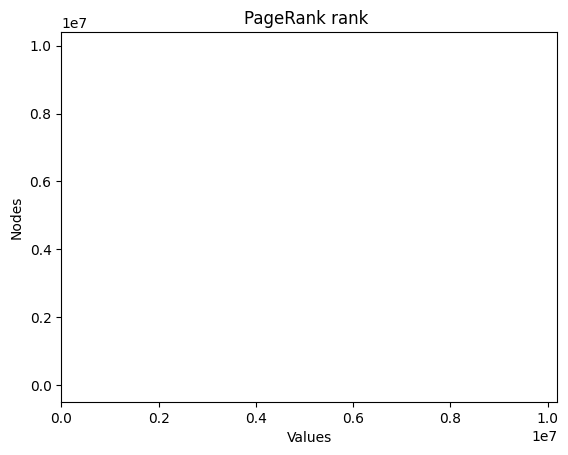

In [107]:
import matplotlib.pyplot as plt
plt.fig()
plt.barh(sorted_scores[0], sorted_scores[1][:100])
plt.xlabel('Values')
plt.ylabel('Nodes')
plt.title('PageRank rank ')

plt.show()